##### Nama : Muhammad Azka Atqiya
##### NIM : 2100812

Kasus:
IPM (Indeks Pembangunan Manusia) adalah ukuran kualitas sumber daya manusia. PMI memiliki tiga dimensi: (1) umur panjang dan hidup sehat (a long and healthy life), (2) pengetahuan (knowledge), dan (3) standar hidup layak (decent standard of living).  PMI dihitung menggunakan data harapan hidup, rata-rata lama sekolah, pengeluaran per kapita.

Asumsikan kategorisasi PMI adalah sebagai berikut:  <60: sangat rendah; 60 < pmi < 70: sedang; 70 < pmi < 80: tinggi; >80 sangat tinggi.

Anda diminta memprediksi tingkat IPM per provinsi tanpa menggunakan data yang dapat digunakan untuk menghitung langsung (data proksi). Model ini bermanfaat untuk pengecekan silang dan dapat digunakan jika data yang diperlukan tidak tersedia.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle 

In [2]:
df = pd.read_csv('D:\KULIAH\Semester 3\Data Mining\data_UAS\pmi.csv')

Alasan saya menggunakan kelima datset dibawah adalah karena saya berasumsi bahwa dataset dataset ini berpengaruh terhadap 3 dimensi yang mempengaruhi IPM

In [3]:
df2 = pd.read_csv('D:\KULIAH\Semester 3\Data Mining\data_UAS\ketidak_cukupan_pangan_prov.csv')
df3 = pd.read_csv('D:\KULIAH\Semester 3\Data Mining\data_UAS\melek_huruf_diatas15.csv')
df4 = pd.read_csv('D:\KULIAH\Semester 3\Data Mining\data_UAS\persen_penduduk_trampil_tik.csv')
df5 = pd.read_csv('D:\KULIAH\Semester 3\Data Mining\data_UAS\persen_rumah_menyewa.csv')

In [4]:
#Mengubah tahub menjadi kategori di setiap dataset
df2['tahun'] = df2['tahun'].astype("category")
df3['tahun'] = df3['tahun'].astype("category")
df4['tahun'] = df4['tahun'].astype("category")
df5['tahun'] = df5['tahun'].astype("category")


In [5]:
#Mengubah provinsi menjadi kategori di setiap dataset
df2['prov'] = df2['prov'].astype("category")
df3['prov'] = df3['prov'].astype("category")
df4['prov'] = df4['prov'].astype("category")
df5['prov'] = df5['prov'].astype("category")

In [6]:
# Mereplace - dengan nan kemudian diisi dengan rata-rata
df3['melek_huruf_diatas15'] = df3['melek_huruf_diatas15'].replace('-', np.nan)
df3['melek_huruf_diatas15'] = df3['melek_huruf_diatas15'].astype("float")
rataRataMelek = df3['melek_huruf_diatas15'].mean()
df3['melek_huruf_diatas15'] = df3['melek_huruf_diatas15'].fillna(rataRataMelek)

In [7]:
# agar tidak ada tabel provinsi dan tahun saat merge, maka di salah satu dataset kedua colom tersebut dihapus
df5.drop('prov', inplace=True, axis=1)
df5.drop('tahun', inplace=True, axis=1)
df_list = [df4,df5]
df_merge = pd.concat(df_list, axis = 1)
df_merge

,tahun,persen_penduduk_trampil_tik,prov,persen_rumah_menyewa
0,2021,60.210000,ACEH,6.86
1,2021,67.410000,SUMATERA UTARA,14.13
2,2021,68.000000,SUMATERA BARAT,11.37
3,2021,70.690000,RIAU,11.82
4,2021,64.470000,JAMBI,5.95
...,...,...,...,...
240,2015,22.112191,MALUKU,5.65
241,2015,15.368161,MALUKU UTARA,4.86
242,2015,22.953005,PAPUA BARAT,12.39
243,2015,11.426463,PAPUA,7.79


Kesimpulan : Dari tabel diatas dapat disimpulkan bahwa penduduk trampil tidak memiliki outlier sama sekali, sedangkan persen_rumah_menyewa memiliki outlier yang cukup jauh

In [9]:
#satukan semua dataset
df_baru = pd.merge(df_merge, df2, on ='prov', how = 'inner')
df_baru1 = pd.merge(df_baru, df3, on ='prov', how = 'inner')

In [10]:
df_baru1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11025 entries, 0 to 11024
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   tahun_x                      11025 non-null  category
 1   persen_penduduk_trampil_tik  11025 non-null  float64 
 2   prov                         11025 non-null  category
 3   persen_rumah_menyewa         11025 non-null  float64 
 4   tahun_y                      11025 non-null  category
 5   pct_tdk_cukup_pangan         11025 non-null  float64 
 6   tahun                        11025 non-null  category
 7   melek_huruf_diatas15         11025 non-null  float64 
dtypes: category(4), float64(4)
memory usage: 476.0 KB


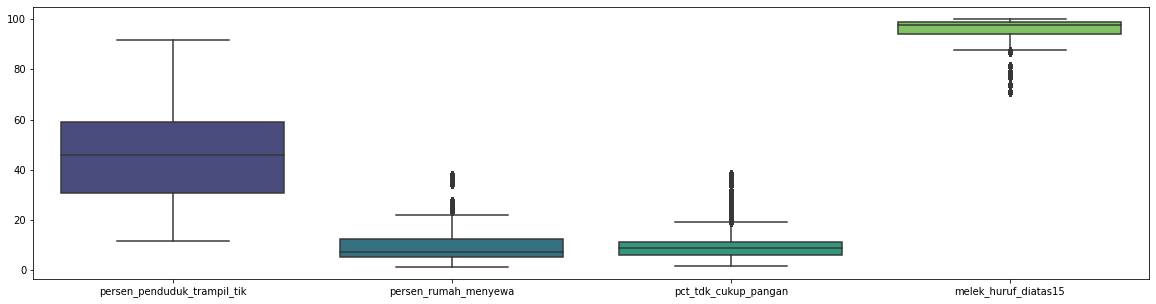

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_baru1,palette='viridis')
plt.show()

Simpulan : Pada data diatas dapat disimpulkan bahwa penduduk terampil di indonesia sudah dapat dikatakan merata, untuk persen_rumah_menyewa masih terdapat banyak outlier, begitupun pct tidak cukup pangan dan melek huruf

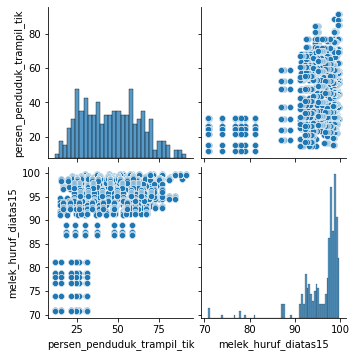

In [22]:
sns.pairplot(data=df_baru1[['persen_penduduk_trampil_tik','melek_huruf_diatas15']])

Kesimpulan pada plot ini adalah provinsi dengan melek huruf tinggi tersebar dihampir semua persen_penduduk_trampil_tik

In [23]:
## PROSES HOT ENCODING

dfTrain = df_baru1.drop(['tahun_x', 'tahun_y','tahun', 'prov'], axis=1)